# 📝 Exercise M4.05
In the previous notebook, we presented a non-penalized logistic regression
classifier. This classifier accepts a parameter `penalty` to add a
regularization. The regularization strength is set using the parameter `C`.

In this exercise, we ask you to train a l2-penalized logistic regression
classifier and to find by yourself the effect of the parameter `C`.

We will start by loading the dataset and create the helper function to show
the decision separation as in the previous code.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_classification.csv")
# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"
data, target = penguins[culmen_columns], penguins[target_column]

data_train, data_test, target_train, target_test = train_test_split(
    data, target, stratify=target, random_state=0,
)
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data
}

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

    return ax

Given the following candidate for the parameter `C`, find out what is the
effect of the value of this parameter on the decision boundary and on the
weights magnitude.

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Cs = [0.01, 0.1, 1, 10]
logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

In [4]:
# Write your code here.
logistic_regression

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Automated search

In [6]:
params_grid = {
    'logisticregression__C': Cs
}

In [68]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [11]:
GridSearchCV?

In [9]:
grid_model = GridSearchCV(logistic_regression, param_grid=params_grid, cv=2, return_train_score= True)

In [12]:
grid_model.fit(data, target)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10]},
             return_train_score=True)

In [16]:
sorted(grid_model.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_logisticregression__C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [17]:
grid_model.best_params_

{'logisticregression__C': 10}

In [18]:
grid_model.best_score_

0.9680150125104254

In [23]:
grid_model.best_estimator_[-1].coef_

array([[ 7.38066908, -2.69714904]])

In [31]:
grid_model.score(data_test,target_test)

0.9636363636363636

Manually checking

In [24]:
Cs = [0.01, 0.1, 1, 10]

In [25]:
logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

In [29]:
logistic_regression[-1].C = 0.01

In [30]:
logistic_regression[-1].C

0.01

[0.7454545454545455,
 0.9272727272727272,
 0.9636363636363636,
 0.9636363636363636]

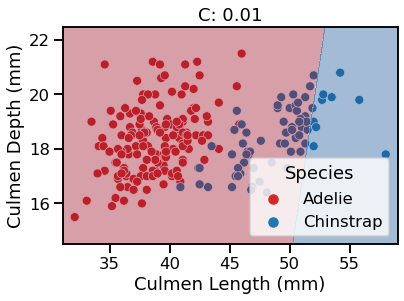

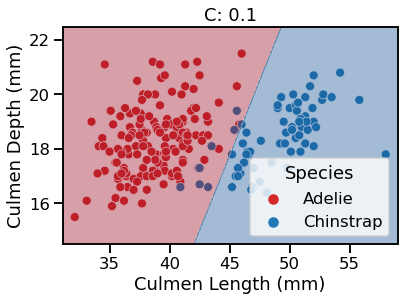

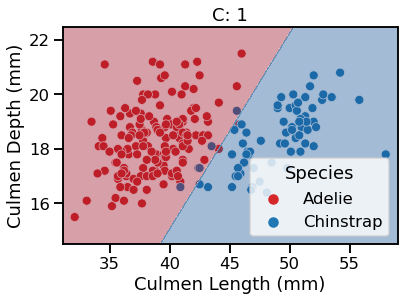

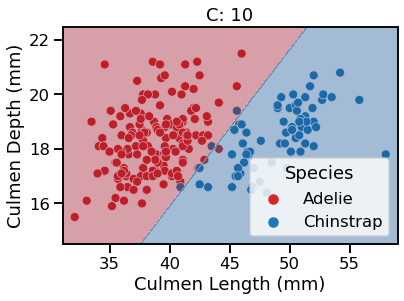

In [71]:
scores = []
coeffs = []
for i in range(0, len(Cs)):
    logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))
    logistic_regression.set_params(logisticregression__C=Cs[i])
    logistic_regression.fit(data_train, target_train)
    scores.append(logistic_regression.score(data_test,target_test))
    coeffs.append(logistic_regression[-1].coef_)
    plt.figure()
    ax = sns.scatterplot(
        data=penguins, x=culmen_columns[0], y=culmen_columns[1],
        hue=target, palette=["tab:red", "tab:blue"])
    plot_decision_function(logistic_regression, range_features, ax=ax)
    plt.title(f"C: {Cs[i]}")

scores   

In [72]:
coeffs

[array([[ 0.47808726, -0.03548662]]),
 array([[ 1.76116224, -0.3530518 ]]),
 array([[ 3.84178164, -1.17674507]]),
 array([[ 7.02466625, -2.69115919]])]

In [51]:
coeffs = np.array(coeffs).reshape(4,2)

In [52]:
coeffs

array([[ 0.47808726, -0.03548662],
       [ 1.76116224, -0.3530518 ],
       [ 3.84178164, -1.17674507],
       [ 7.02466625, -2.69115919]])

In [53]:
coeffs = {'f1_coef': coeffs[:,0],
'f2_coef': coeffs[:,1]}

In [54]:
coeffs

{'f1_coef': array([0.47808726, 1.76116224, 3.84178164, 7.02466625]),
 'f2_coef': array([-0.03548662, -0.3530518 , -1.17674507, -2.69115919])}

In [56]:
coeffs = pd.DataFrame.from_dict(coeffs)

In [57]:
coeffs

,f1_coef,f2_coef
0,0.478087,-0.035487
1,1.761162,-0.353052
2,3.841782,-1.176745
3,7.024666,-2.691159


<AxesSubplot:>

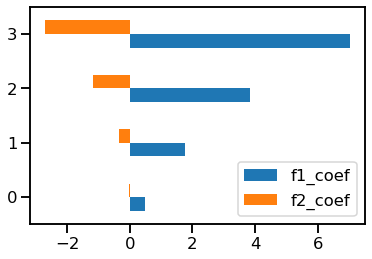

In [66]:
coeffs.plot.barh()